In [1]:
import os, sys
import pandas as pd
import numpy as np
import xarray as xr
from itertools import product
from datetime import datetime, timedelta
from scipy.stats import scoreatpercentile # calculate percentile
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches # legend add manually

In [2]:
parameter = 'rain_day'
catchment = 'Central West River Catchment'

In [3]:
dir_in = '/g/data/er4/zk6340/Hydro_projection'
dir_out = '/g/data/er4/zk6340/Hydro_projection'

In [4]:
ds = pd.read_csv(os.path.join(dir_in, '%s_%s.csv')%(parameter,catchment), index_col = 0)

In [5]:
# add few columns
ds['Change in Daily Mean']=(ds['Mean over future period']-ds['Mean over historical period'])*100/ds['Mean over historical period']
ds['Change in Daily Max']=(ds['Max over future period']-ds['Max over historical period'])*100/ds['Max over historical period']
ds['Change in Return Period']=(ds['20-yr yT over future period']-ds['20-yr yT over historical period'])*100/ds['20-yr yT over historical period']

In [6]:
def calculate_perc(ds,year):
    column_names = ['Change in Daily Mean','Change in Daily Max','Change in Return Period']
    ds_merge = []
    for col_name in enumerate(column_names): 
        ds['Percentage Change'] = ds[col_name[1]]
        ds['Indicator'] = col_name[1]
        ds_one = ds.drop(['Change in Daily Mean','Change in Daily Max','Change in Return Period'], axis=1)
        ds_merge.append(ds_one)
    ds_complete = pd.concat([ds_merge[0],ds_merge[1],ds_merge[2]])
    ds_complete.loc[ds_complete['Indicator'] == 'Change in Daily Mean', 'Indicator'] = 'Daily Mean'
    ds_complete.loc[ds_complete['Indicator'] == 'Change in Daily Max', 'Indicator'] = 'Daily Max'
    ds_complete.loc[ds_complete['Indicator'] == 'Change in Return Period', 'Indicator'] = 'Return Period'
    ds_scenario = ds_complete[ds_complete['Scenario']==year]
    def ds_plot(which_indicator,which_rcp):
        ds_indicator = ds_scenario[ds_scenario['Indicator']==which_indicator]
        what_change = ds_indicator[ds_indicator['Emission']==which_rcp]['Percentage Change']
        return(what_change)
    perc = [scoreatpercentile(ds_plot('Daily Mean','rcp45'),10), scoreatpercentile(ds_plot('Daily Mean','rcp45'),50)
            ,scoreatpercentile(ds_plot('Daily Mean','rcp45'),50), scoreatpercentile(ds_plot('Daily Mean','rcp45'),90)
            ,scoreatpercentile(ds_plot('Daily Mean','rcp85'),10), scoreatpercentile(ds_plot('Daily Mean','rcp85'),50)
            ,scoreatpercentile(ds_plot('Daily Mean','rcp85'),50), scoreatpercentile(ds_plot('Daily Mean','rcp85'),90)
            ,scoreatpercentile(ds_plot('Daily Max','rcp45'),10),scoreatpercentile(ds_plot('Daily Max','rcp45'),50)
            ,scoreatpercentile(ds_plot('Daily Max','rcp45'),50),scoreatpercentile(ds_plot('Daily Max','rcp45'),90)
            ,scoreatpercentile(ds_plot('Daily Max','rcp85'),10),scoreatpercentile(ds_plot('Daily Max','rcp85'),50)
            ,scoreatpercentile(ds_plot('Daily Max','rcp85'),50),scoreatpercentile(ds_plot('Daily Max','rcp85'),90)
            ,scoreatpercentile(ds_plot('Return Period','rcp45'),10),scoreatpercentile(ds_plot('Return Period','rcp45'),50)
            ,scoreatpercentile(ds_plot('Return Period','rcp45'),50),scoreatpercentile(ds_plot('Return Period','rcp45'),90)
            ,scoreatpercentile(ds_plot('Return Period','rcp85'),10),scoreatpercentile(ds_plot('Return Period','rcp85'),50)
            ,scoreatpercentile(ds_plot('Return Period','rcp85'),50),scoreatpercentile(ds_plot('Return Period','rcp85'),90)]
    return(perc)

In [7]:
ds_perc0 = calculate_perc(ds,2030)
ds_perc1 = calculate_perc(ds,2070)

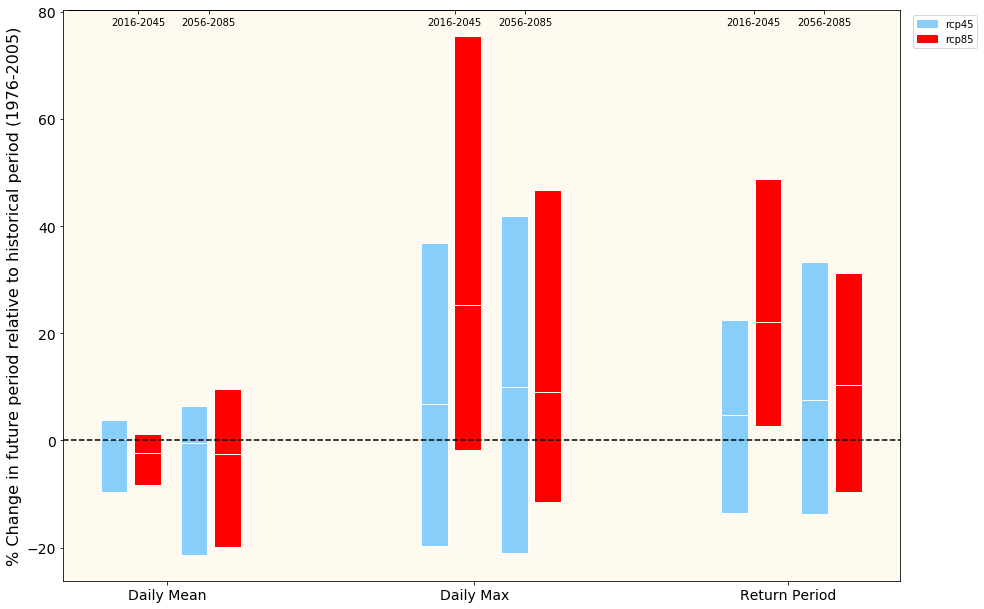

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 10.5))
ax.set_facecolor('floralwhite')

ax.broken_barh([(1,0.2)], (ds_perc0[0], ds_perc0[1]-ds_perc0[0]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(1,0.2)], (ds_perc0[2], ds_perc0[3]-ds_perc0[2]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(1.25,0.2)], (ds_perc0[4], ds_perc0[5]-ds_perc0[4]),color ='r',edgecolor = 'w')
ax.broken_barh([(1.25,0.2)], (ds_perc0[6], ds_perc0[7]-ds_perc0[6]),color ='r',edgecolor = 'w')
ax.broken_barh([(3.4,0.2)], (ds_perc0[8], ds_perc0[9]-ds_perc0[8]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(3.4,0.2)], (ds_perc0[10], ds_perc0[11]-ds_perc0[10]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(3.65,0.2)], (ds_perc0[12], ds_perc0[13]-ds_perc0[12]),color ='r',edgecolor = 'w')
ax.broken_barh([(3.65,0.2)], (ds_perc0[14], ds_perc0[15]-ds_perc0[14]),color ='r',edgecolor = 'w')
ax.broken_barh([(5.65,0.2)], (ds_perc0[16], ds_perc0[17]-ds_perc0[16]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(5.65,0.2)], (ds_perc0[18], ds_perc0[19]-ds_perc0[18]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(5.90,0.2)], (ds_perc0[20], ds_perc0[21]-ds_perc0[20]),color ='r',edgecolor = 'w')
ax.broken_barh([(5.90,0.2)], (ds_perc0[22], ds_perc0[23]-ds_perc0[22]),color ='r',edgecolor = 'w')

ax.broken_barh([(1.6,0.2)], (ds_perc1[0], ds_perc1[1]-ds_perc1[0]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(1.6,0.2)], (ds_perc1[2], ds_perc1[3]-ds_perc1[2]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(1.85,0.2)], (ds_perc1[4], ds_perc1[5]-ds_perc1[4]),color ='r',edgecolor = 'w')
ax.broken_barh([(1.85,0.2)], (ds_perc1[6], ds_perc1[7]-ds_perc1[6]),color ='r',edgecolor = 'w')
ax.broken_barh([(4.0,0.2)], (ds_perc1[8], ds_perc1[9]-ds_perc1[8]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(4.0,0.2)], (ds_perc1[10], ds_perc1[11]-ds_perc1[10]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(4.25,0.2)], (ds_perc1[12], ds_perc1[13]-ds_perc1[12]),color ='r',edgecolor = 'w')
ax.broken_barh([(4.25,0.2)], (ds_perc1[14], ds_perc1[15]-ds_perc1[14]),color ='r',edgecolor = 'w')
ax.broken_barh([(6.25,0.2)], (ds_perc1[16], ds_perc1[17]-ds_perc1[16]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(6.25,0.2)], (ds_perc1[18], ds_perc1[19]-ds_perc1[18]),color ='lightskyblue',edgecolor = 'w')
ax.broken_barh([(6.50,0.2)], (ds_perc1[20], ds_perc1[21]-ds_perc1[20]),color ='r',edgecolor = 'w')
ax.broken_barh([(6.50,0.2)], (ds_perc1[22], ds_perc1[23]-ds_perc1[22]),color ='r',edgecolor = 'w')

#ax.set_xticklabels([])
rcp45 = mpatches.Patch(color='lightskyblue', label='rcp45')
rcp85 = mpatches.Patch(color='r', label='rcp85')
plt.legend(handles=[rcp45,rcp85], bbox_to_anchor=(1.01, 1), loc='upper left')
#plt.legend(loc="upper left")
plt.axhline(y=0, color='k', linestyle='--')
plt.ylabel("% Change in future period relative to historical period (1976-2005)", size=16)
plt.xlabel("",size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding label
x_main = np.array([1.5,3.8,6.15])
main_xticks = ['Daily Mean','Daily Max','Return Period']
plt.xticks(x_main, main_xticks)
#plt.tick_params(axis='x', which='major', pad=50)

# create second Axes. Note the 0.0 height #### this part is manually tuned - need to automatise
ax2 = fig.add_axes((0.13,0.88,0.7,0))
ax2.yaxis.set_visible(False) # hide the yaxis
x_minor = np.array([0.6,1.2,3.3,3.9,5.85,6.45])
minor_xticks = ['2016-2045','2056-2085','2016-2045','2056-2085','2016-2045','2056-2085']
ax2.set_xticks(x_minor)
ax2.set_xticklabels(minor_xticks)

#plt.show()
#plt.title("Projected Flood Scenario over %s"%(which_cluster), size=18)
output_file = 'Flood_plot_%s_%s.jpeg'%(parameter,catchment) 
plt.savefig(os.path.join(dir_out,output_file))

In [9]:
# a = ds0[ds0['Emission']=='rcp45']['Change in Daily Mean']
# print(np.percentile(a, 10))
# print(np.percentile(a, 50))
# print(np.percentile(a, 90))